<a href="https://colab.research.google.com/github/burakerdgn/GoogleColab/blob/main/Tensorflow_Course_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Connection to Google Drive***


In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive



In [ ]:
!google-drive-ocamlfuse drive

In [ ]:
import sys
sys.path.insert(0,'drive/Colab_workspace')

In [ ]:
cd drive/Colab_workspace/

/content/drive/Colab_workspace


In [ ]:
!pip install -q keras
import keras


In [ ]:
!ls

DATA		      ngrok-stable-linux-amd64.zip
keras_deneme1.ipynb   pratik-derin-ogrenme-uygulamalari
keras_deneme_2.ipynb  rakam_tanima_CNN_MNIST_Keras.py
keras-mnist-tutorial  tb_logs
ngrok


## ***Bank Data Project***

In [ ]:
import numpy as np
from numpy import genfromtxt
data = genfromtxt('DATA/bank_note_data.txt',delimiter=',')
data

In [ ]:
labels = data[:,4]
labels

In [ ]:
features = data [:,0:4]
features

In [ ]:
X = features
y = labels

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler_object = MinMaxScaler()

In [ ]:
scaler_object.fit(X_train)

In [ ]:
scaled_X_train = scaler_object.transform(X_train)
scaled_X_test = scaler_object.transform(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense



In [ ]:
model = Sequential()
model.add(Dense(4,input_dim=4,activation='relu'))

In [ ]:
model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.fit(scaled_X_train,y_train,epochs=50,verbose=2)

In [ ]:
 abc = model.predict_classes(scaled_X_test)

In [ ]:
model.metrics_names

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,model.predict_classes(scaled_X_test))

## ***KERAS CNN WITH MNIST***

---




In [ ]:
from keras.datasets import mnist

In [ ]:
import tensorflow as tf
print(tf.__version__)

In [ ]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [ ]:
x_test.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
single_image = x_train[0]
plt.imshow(single_image,cmap='gray_r')

In [ ]:
y_train

In [ ]:
from keras.utils.np_utils import  to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape


In [ ]:
from keras.models import Sequential

In [ ]:
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
x_train.shape

In [ ]:
model.fit(x_train,y_cat_train,epochs=5)

In [ ]:
x_test.shape

In [ ]:
y_cat_test.shape

In [ ]:
model.evaluate(x_test,y_cat_test)

In [ ]:
from sklearn.metrics import  classification_report

In [ ]:
predictions = model.predict_classes(x_test)

In [ ]:
print(classification_report(y_test,predictions))

## ***KERAS CNN WITH CIFAR-10***

---



In [ ]:
from keras.datasets import cifar10

In [ ]:
(x_train,y_train),(x_test,y_test) = cifar10.load_data()

In [ ]:
x_train.shape

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
plt.imshow(x_train[12005])

In [ ]:
x_train = x_train/255
x_test = x_test/255

In [ ]:
x_test.shape

In [ ]:
y_cat_train = to_categorical(y_train,10)
y_cat_test = to_categorical(y_test,10)

In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Repeat Convolutional and pooling layer

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer (Neuron number muust be 2^x)

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:
model.fit(x_train,y_cat_train,verbose=1,epochs=10,batch_size=25)

In [ ]:
model.evaluate(x_test,y_cat_test,batch_size=1)

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

print(classification_report(y_test,predictions))

## ***Fashion MNIST Project***

---



**Load Data**

In [ ]:
from keras.datasets import fashion_mnist
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

**Visualize the Data**

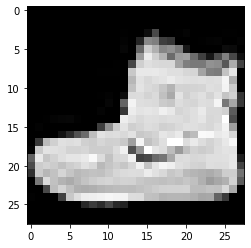

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
single_image = x_train[0]
plt.imshow(single_image,cmap='gray')


**Preprocessing the Data (Normalize the X train and X test by dividing by the max value of the image arrays**

In [ ]:
x_train = x_train/x_train.max()
x_test = x_test/x_test.max()

**Add 4. dimension to X arrays**


In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

**Convert Y arrays into one-hot encoded for categorical analysis by Keras**

In [ ]:
from keras.utils.np_utils import  to_categorical

y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

### **Build the Model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten


In [ ]:
model = Sequential()

# CONVOLUTIONAL LAYER

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

# Pooling Layer

model.add(MaxPool2D(pool_size=(2,2)))

# Flatten  2d --> 1d

model.add(Flatten())

# Dense Layer

model.add(Dense(128,activation='relu'))   # 128 --> Neurons' number (optional for any value which is 2^x)

model.add(Dense(10,activation='softmax')) # 10 --> (class number)

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 32)        544       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
_________________________________________________________________


**Train the set**

In [ ]:
model.fit(x_train,y_cat_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5360 - accuracy: 0.8101
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2856 - accuracy: 0.8980
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2402 - accuracy: 0.9145
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2129 - accuracy: 0.9252
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.1964 - accuracy: 0.9292


In [ ]:
model.evaluate(x_test,y_cat_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2718 - accuracy: 0.9064


[0.2718176245689392, 0.9064000248908997]

In [ ]:
from sklearn.metrics import classification_report

predictions = model.predict_classes(x_test)

print(classification_report(y_test,predictions))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1000
           1       0.99      0.98      0.99      1000
           2       0.83      0.86      0.85      1000
           3       0.95      0.87      0.91      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.97      0.98      1000
           6       0.74      0.74      0.74      1000
           7       0.95      0.98      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.97      0.97      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [ ]:
x_test.shape

(10000, 28, 28, 1)

In [ ]:
import numpy as np
from keras.preprocessing import image

one_image = x_test[6:2:2]
one_image.shape

(0, 28, 28, 1)

**Test Single Image**

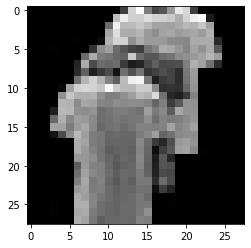

In [ ]:
array1 =  x_test[8420,:,:,0]
plt.imshow(array1,cmap='gray')

In [ ]:
array1 = np.expand_dims(array1,axis=(0,3))
array1.shape

(1, 28, 28, 1)

In [ ]:
model.predict_classes(array1)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


array([0])

# ***YOLO PROJECT***

In [ ]:
cd DATA/06-YOLOv3/

/content/drive/Colab_workspace/DATA/06-YOLOv3


In [ ]:
import os
import time
import cv2
import numpy as np
from model.yolo_model import YOLO

In [ ]:
def process_image(img):

      image = cv2.resize(img, (416, 416),
                          interpolation=cv2.INTER_CUBIC)
      image = np.array(image, dtype='float32')
      image /= 255.
      image = np.expand_dims(image, axis=0)
      return image

In [ ]:
def get_classes(file):

        with open(file) as f:
           class_names = f.readlines()
        class_names = [c.strip() for c in class_names]

        return class_names

In [ ]:
def draw(image, boxes, scores, classes, all_classes):
   
        for box, score, cl in zip(boxes, scores, classes):
            x, y, w, h = box
   
            top = max(0, np.floor(x + 0.5).astype(int))
            left = max(0, np.floor(y + 0.5).astype(int))
            right = min(image.shape[1], np.floor(x + w + 0.5).astype(int))
            bottom = min(image.shape[0], np.floor(y + h + 0.5).astype(int))
    
            cv2.rectangle(image, (top, left), (right, bottom), (255, 0, 0), 2)
            cv2.putText(image, '{0} {1:.2f}'.format(all_classes[cl], score),
                       (top, left - 6),
                        cv2.FONT_HERSHEY_SIMPLEX,
                        0.6, (0, 0, 255), 1,
                        cv2.LINE_AA)
    
            print('class: {0}, score: {1:.2f}'.format(all_classes[cl], score))
            print('box coordinate x,y,w,h: {0}'.format(box))
    
        print()

In [ ]:
def detect_image(image, yolo, all_classes):
   
        pimage = process_image(image)
  
        start = time.time()
        boxes, classes, scores = yolo.predict(pimage, image.shape)
        end = time.time()
   
        print('time: {0:.2f}s'.format(end - start))
    
        if boxes is not None:
            draw(image, boxes, scores, classes, all_classes)
    
        return image

In [ ]:
 def detect_video(video, yolo, all_classes):
 
        video_path = os.path.join("videos", "test", video)
        camera = cv2.VideoCapture(video_path)
        cv2.namedWindow("detection", cv2.WINDOW_AUTOSIZE)
  
        # Prepare for saving the detected video\n",
        sz = (int(camera.get(cv2.CAP_PROP_FRAME_WIDTH)),
            int(camera.get(cv2.CAP_PROP_FRAME_HEIGHT)))
        fourcc = cv2.VideoWriter_fourcc(*'mpeg')
 
        vout = cv2.VideoWriter()
        vout.open(os.path.join("videos", "res", video), fourcc, 20, sz, True)
    
        while True:
            res, frame = camera.read()
    
            if not res:
                break
  
            image = detect_image(frame, yolo, all_classes)
            cv2.imshow("detection", image)
  
            # Save the video frame by frame
            vout.write(image)
    
            if cv2.waitKey(110) & 0xff == 27:
                    break
  
        vout.release()  
        camera.release()
    

In [ ]:
yolo = YOLO(0.6,0.5)
file = 'data/coco_classes.txt'
all_classes = get_classes(file)

***Detecting Images***

In [ ]:
f = 'images/photo1.jpg'
image = cv2.imread(f)
image = detect_image(image, yolo, all_classes)
cv2.imwrite('images/res/photo1_detected.jpg',image)


time: 31.14s
class: person, score: 0.99
box coordinate x,y,w,h: [203.84439826  66.64711142 100.21853447 210.87221336]
class: person, score: 0.88
box coordinate x,y,w,h: [422.88118601  86.06504011  53.96313965 148.27685761]
class: person, score: 0.70
box coordinate x,y,w,h: [387.61651516  80.25743079  52.08951235 160.3105607 ]
class: car, score: 1.00
box coordinate x,y,w,h: [ -6.70309365  89.40106821 216.0769105  138.94352341]



True

***Detect Video***

In [ ]:
## detect video one at a time in videos/test folder
# video = 'library1.mp4'
#detect_video(video,yolo, all_classes)

# **CapStone Project**

In [ ]:
import cv2
import numpy as np

from sklearn.metrics import pairwise

In [ ]:
background = None

accumulated_weight = 0.5

roi_top = 20
roi_bottom = 300
roi_right = 300
roi_left = 600


In [ ]:
def calc_accum_avg(frame,accumulated_weight):

  global background

  if background is none:
    background = frame.copy().astype('float')
    return None
  
  cv2.accumulateWeighted(frame,background,accumulated_weight)

In [ ]:
def segment(frame,threshold=25):

  diff = cv2.absdiff(background.astype('uint8'),frame)

  ret,thresholded = cv2.threshold(diff,threshold_min,255,cv2.THRESH_BINARY)

  image,contours,hierarchy = cv2.findContours(thresholded.copy(),cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)

  if len(contours) == 0:
    return None

  else:
     hand_segment = max(contours,key=cv2.contourArea)

     return(thresholded,hand_segment)

In [ ]:
def count_fingers(thresholded,hand_segment):

  conv_hull =cv2.convexHull(hand_segment)

  top = tuple(conv_hull[conv_hull[:,:,1].argmin()[0]])
  bottom = tuple(conv_hull[conv_hull[:,:,1].argmax()[0]])
  left = tuple(conv_hull[conv_hull[:,:,0].argmin()[0]])
  right = tuple(conv_hull[conv_hull[:,:,0].argmax()[0]])

  cX = (left[0] + right[0]) // 2
  cY = (top[1] + bottom[1]) // 2

  distance = pairwase.euclidean_distances([cX,cY], Y=[left,right,top,bottom])[0]

  max_distance = distance.max()

  radius = int(0.9*max_distancce)
  circumfrence = (2*np.pi*radius)

  circular_roi = np.zeros(thresholded[:,2],dtype='uint8')

  cv2.circle(circular_roi,(cX,cY),radius,255,10)

  circular_roi = cv2.bitwise_and(thresholded, thresholded, mask=circular_roi)

  image, contours, hierarchy = cv2.findContours(circular_roi.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

  count = 0

  for cnt in contours:
 
          (x, y, w, h) = cv2.boundingRect(cnt)
  
          out_of_wrist = ((cY + (cY * 0.25)) > (y + h))
          # 2. Number of points along the contour does not exceed 25% of the circumference of the circular ROI (otherwise we're counting points off the hand)\n",
          limit_points = ((circumference * 0.25) > cnt.shape[0]) 
           
          if  out_of_wrist and limit_points:
                count += 1
    
  return count


In [ ]:
#cam = cv2.VideoCapture(0)

num_frames = 0

while True:
   
        ret, frame = cam.read()
  
        frame = cv2.flip(frame, 1)
    
        frame_copy = frame.copy()
   
        gray = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        gray = cv2.GaussianBlur(gray, (7, 7), 0)

        if num_frames < 60:
           calc_accum_avg(gray, accumulated_weight)

           if num_frames <= 59:
                cv2.putText(frame_copy, "WAIT! GETTING BACKGROUND AVG.", (200, 400), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)
                cv2.imshow("Finger Count",frame_copy)
        else:
            hand = segment(gray)
  
            if hand is not None:

                thresholded, hand_segment = hand
  
                cv2.drawContours(frame_copy, [hand_segment + (roi_right, roi_top)], -1, (255, 0, 0),1)
 
                fingers = count_fingers(thresholded, hand_segment)
  
                cv2.putText(frame_copy, str(fingers), (70, 45), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,255), 2)

                cv2.imshow("Thesholded", thresholded)


        cv2.rectangle(frame_copy, (roi_left, roi_top), (roi_right, roi_bottom), (0,0,255), 5)
        num_frames += 1

        cv2.imshow("Finger Count", frame_copy)

        k = cv2.waitKey(1) & 0xFF

        if k == 27:
            break

cam.release()
cv2.destroyAllWindows()


AttributeError: ignored

# **Build own model**

In [ ]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
# Define Linear Regression Model
class LinearRegression(tf.keras.Model):
  def __init__(self,num_inputs, num_outputs):
    super(LinearRegression,self).__init__()
    self.W = tf.Variable(
        tf.random_normal_initializer()((num_inputs, num_outputs)))
    self.b = tf.Variable(tf.zeros(num_outputs))
    self.params = [self.W, self.b]

  def call(self, inputs):
    return tf.matmul(inputs, self.W) + self.b

In [ ]:
# Create a dataset
N = 100
D = 1
K = 1
X = np.random.random((N,D)) * 2 - 1
w = np.random.randn(D,K)
b = np.random.randn()
Y = X.dot(w) + b + np.random.randn(N,1) * 0.1

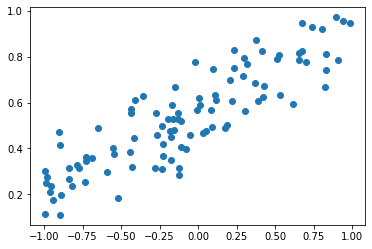

In [ ]:
plt.scatter(X,Y)

In [ ]:
# Cast type, otherwise Tensorflow will complain
X = X.astype(np.float32)
Y = Y.astype(np.float32)

In [ ]:
# Define the loss
def get_loss(model, inputs, targets):
  predictions = model(inputs)
  error = targets - predictions
  return tf.reduce_mean(tf.square(error))

In [ ]:
# Gradient function
def get_grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = get_loss(model, inputs, targets)

  # return gradient
  return tape.gradient(loss_value, model.params)

In [ ]:
# Create and train the model
model = LinearRegression(D,K)

# Print the params before training
print("Initial params:")
print(model.W)
print(model.b)

Initial params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.07751474]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.], dtype=float32)>


In [ ]:
# Store the losses here
losses = []

# Create an optimizer
optimizer = tf.keras.optimizers.SGD(learning_rate=0.2)

# Run the training loop
for i in range(100):
  # Get gradients
  grads = get_grad(model,X,Y)

  # Do one step of gradient descent: param <- param - learning_rate * grad
  optimizer.apply_gradients(zip(grads, model.params))

  # Store the loss
  loss = get_loss(model, X ,Y)
  losses.append(loss)

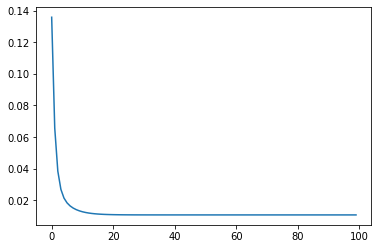

In [ ]:
plt.plot(losses)

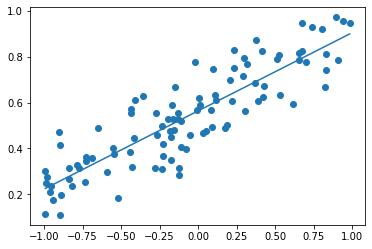

In [ ]:
x_axis = np.linspace(X.min(), X.max(), 100)
y_axis = model.predict(x_axis.reshape(-1,1)).flatten()

plt.scatter(X,Y)
plt.plot(x_axis, y_axis)

In [ ]:
print("Predicted params:")
print(model.W)
print(model.b)

Predicted params:
<tf.Variable 'Variable:0' shape=(1, 1) dtype=float32, numpy=array([[0.34155968]], dtype=float32)>
<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.56357706], dtype=float32)>


In [ ]:
print("True params:")
w,b

True params:


(array([[0.33849858]]), 0.5746444925776516)

## **Mean Square Error**

Linear regression'da noktalarin hepsine esit uzaklikta olucak sekilde cekilen cizginin hesaplanmasi icin kullanilan formul

## **Binary Cross-Entropy**

The correct loss function to use for binary classification.  Eger 1 ve 0 li bir siniflandirma yapilacaksa bu function kullanilir

## **Categorical Cross Entropy**

Coklu siniflandir icin kullanilan loss function cesidi

## **Gradient Descent**

* For models(such as linear regression) we come up with with a cost / loss function

* We want to minimize the cost(L) with respect to the parameters (w)

* **Gradient Descent -> Dereceli azalma** anlamina gelir, 2. dereceden denklemlerin turevleri bize denklemin olusturdugu scope un egrisini verirken, denklemin turevini 0 a esitleyip , 2. dereceden denklemin max ve min noktalari bulanabilir. Gradient Descent te 2. dereceden buyuk denklemlerin cozumu icin kullanilan tekniktir. 

* **Hyperparameters** = Learning rateleri kucuk tutularak, denklemin min noktasina ulasilmaya calisilir. Fakat learning rateler buyuk alinirsa scope ta min noktasi atlanarak karsi tarafa gecilebilir

* **Epochs** = Minimum loss function bulunurken , iterative deneme sayisi

  




## **Stochastic Gradient Descent**

* SGD, daha hizli train etmek icin eldeki verilerden random ornekler cekildiginde kullanilir. Ex. Batch size!!!

## **Momentum**

* Gradient Descent uygulanirken, islemin ara noktalarda sikismamasi ve daha hizli sonuca varmak icin kullanilan yontem

* https://www.quora.com/What-does-momentum-mean-in-neural-networks



## **Variable and Adaptive Learning Rates**

* **Step Decay** = Belli sayida epochs'tan sonra learning rate'in belli oranda dusurulmesi

* **Exponential Decay** = Learning Rate exponential sekilde surekli azaliyor

* **AdaGrad** = Adaptive Learning Rate Techniques. Her adimda Learning Rate Degisir
    * **Cache** = Her neural vectorun ayni zamanda bir cache vektoru vardir. Gradient'e dogru orantili olarak degisir. Yüksek gradient olan yerlerde cache artar learning rate duser.
* **RMSProp** = AdaGrad tekniginde learning rate cok hizli bir sekilde 0 a yaklasiyor cunku cache cok hizli buyuyor.Bu buyumeyi kontrol altina almak icin cache denklemine decay rate eklenerek cache'in hizli büyümesi kontrol altina aliniyor


## **Adam**

* **Adam** = Adaptive Moment Estimation, bir baska gradient descent modify etme yontemi
    * Cok kullanilmasinin sebebi default settings halinde bile iyi sonuclar vermesi. Learning rate ve momentum parameter ayarlamasina gerek yok
    * RMSprop'un ileri versiyonu
    * Geoffrey Hinton'in phd ogrencisi Jimmy Ba tarafindan gelistirildi
    


# **GAN**

In [ ]:
# Inputs

from tensorflow.keras.layers import Input, Dense, LeakyReLU, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys, os

In [ ]:
!pip install keras

In [ ]:
# Load in the data
mnist = tf.keras.datasets.mnist

(x_train,y_train),(x_test,y_test) = mnist.load_data()

# map inputs to (-1,+1) for better training
x_train, x_test = x_train / 255.0*2-1, x_test / 255.0*2-1
print("x_train.shape:",x_train.shape)

x_train.shape: (60000, 28, 28)


In [ ]:
# Flatten the data
N, H, W = x_train.shape
D = H * W
x_train = x_train.reshape(-1,D)
x_test = x_test.reshape(-1,D)

In [ ]:
# Dimensionality of the laten space
latent_dim = 100

In [ ]:
# Get the generator model
def build_generator(latent_dim):
  i = Input(shape=(latent_dim))
  x = Dense(256,activation=LeakyReLU(alpha=0.2))(i)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(1024, activation=LeakyReLU(alpha=0.2))(x)
  x = BatchNormalization(momentum=0.7)(x)
  x = Dense(D, activation='tanh')(x)

  model = Model(i,x)
  return model

In [ ]:
# Get the discriminator model
def build_discriminator(img_size):
  i = Input(shape=(img_size,))
  x = Dense(512, activation=LeakyReLU(alpha=0.2))(i)
  x = Dense(256, activation=LeakyReLU(alpha=0.2))(x)
  x = Dense(1, activation='sigmoid')(x)
  model = Model(i,x)
  return model

In [ ]:
# Compile both models in preparation for training

#Build and compile the discriminator
discriminator = build_discriminator(D)
discriminator.compile(loss='binary_crossentropy',optimizer=Adam(0.0002, 0.5),metrics=['accuracy'])

# Build and compile the combined model
generator = build_generator(latent_dim)

#Create an Input to represent noise sample from latent space
z = Input(shape=(latent_dim,))

#Pass noise through generator to get an image
img = generator(z)

#Make sure only the generator is trained
discriminator.trainable = False

#The true output is fake, but we label them real! (niye amk??)
fake_pred = discriminator(img)

#Create the combined model object
combined_model = Model(z,fake_pred)

#Compile the combined model
combined_model.compile(loss='binary_crossentropy',optimizer=Adam(0.0002, 0.5))

In [ ]:
# Train the GAN

#Config
batch_size = 32
epochs = 30000
sample_period = 200 # every `sample_period` steps generate and save some data


# Create batch labels to use when calling train_on_batch
ones = np.ones(batch_size)
zeros = np.zeros(batch_size)

# Store the losses
d_losses = []
g_losses = []

# Create a folder to store generated images
if not os.path.exists('gan_images'):
  os.makedirs('gan_images')

In [ ]:
# A function to generate a grid of random samples from the generator
# and save them to a file
def sample_images(epoch):
  rows, cols = 5, 5
  noise = np.random.randn(rows * cols, latent_dim)
  imgs = generator.predict(noise)

  # Rescale images 0 - 1
  imgs = 0.5 * imgs + 0.5

  fig, axs = plt.subplots(rows, cols)
  idx = 0
  for i in range(rows):
    for j in range(cols):
      axs[i,j].imshow(imgs[idx].reshape(H, W), cmap='gray')
      axs[i,j].axis('off')
      idx += 1
  fig.savefig("gan_images/%d.png" % epoch)
  plt.close()

In [ ]:
# Main training loop
for epoch in range(epochs):
  ###########################
  ### Train discriminator ###
  ###########################
  
  # Select a random batch of images
  idx = np.random.randint(0, x_train.shape[0], batch_size)
  real_imgs = x_train[idx]
  
  # Generate fake images
  noise = np.random.randn(batch_size, latent_dim)
  fake_imgs = generator.predict(noise)
  
  # Train the discriminator
  # both loss and accuracy are returned
  d_loss_real, d_acc_real = discriminator.train_on_batch(real_imgs, ones)
  d_loss_fake, d_acc_fake = discriminator.train_on_batch(fake_imgs, zeros)
  d_loss = 0.5 * (d_loss_real + d_loss_fake)
  d_acc  = 0.5 * (d_acc_real + d_acc_fake)
  
  
  #######################
  ### Train generator ###
  #######################
  
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model.train_on_batch(noise, ones)
  
  # do it again!
  noise = np.random.randn(batch_size, latent_dim)
  g_loss = combined_model.train_on_batch(noise, ones)
  
  # Save the losses
  d_losses.append(d_loss)
  g_losses.append(g_loss)
  
  if epoch % 100 == 0:
    print(f"epoch: {epoch+1}/{epochs}, d_loss: {d_loss:.2f}, \
      d_acc: {d_acc:.2f}, g_loss: {g_loss:.2f}")
  
  if epoch % sample_period == 0:
    sample_images(epoch)

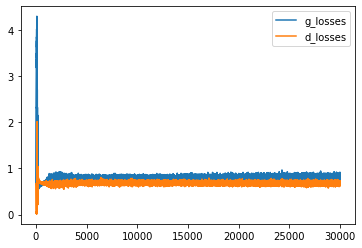

In [ ]:
plt.plot(g_losses, label='g_losses')
plt.plot(d_losses, label='d_losses')
plt.legend()

In [ ]:
!ls gan_images

0.png	   13800.png  17800.png  21600.png  25600.png  29600.png  6600.png
10000.png  14000.png  18000.png  21800.png  25800.png  29800.png  6800.png
1000.png   1400.png   1800.png	 22000.png  26000.png  3000.png   7000.png
10200.png  14200.png  18200.png  2200.png   2600.png   3200.png   7200.png
10400.png  14400.png  18400.png  22200.png  26200.png  3400.png   7400.png
10600.png  14600.png  18600.png  22400.png  26400.png  3600.png   7600.png
10800.png  14800.png  18800.png  22600.png  26600.png  3800.png   7800.png
11000.png  15000.png  19000.png  22800.png  26800.png  4000.png   8000.png
11200.png  15200.png  19200.png  23000.png  27000.png  400.png	  800.png
11400.png  15400.png  19400.png  23200.png  27200.png  4200.png   8200.png
11600.png  15600.png  19600.png  23400.png  27400.png  4400.png   8400.png
11800.png  15800.png  19800.png  23600.png  27600.png  4600.png   8600.png
12000.png  16000.png  20000.png  23800.png  27800.png  4800.png   8800.png
1200.png   1600.png   2000.png

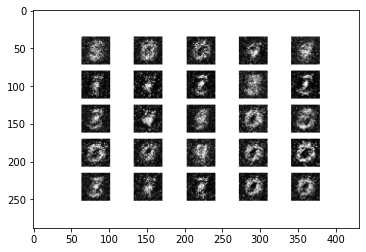

In [ ]:
from skimage.io import imread
a = imread('gan_images/400.png')
plt.imshow(a)

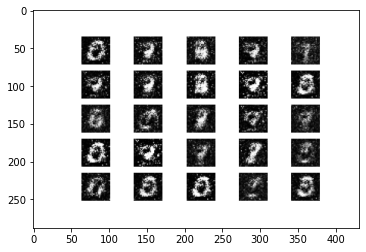

In [ ]:
a = imread('gan_images/800.png')
plt.imshow(a)

# **Linear Classification**

In [ ]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 160983 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.26-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.26-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [ ]:
!mkdir -p drive
!google-drive-ocamlfuse drive
import sys
sys.path.insert(0,'drive/Colab_workspace/TF_Lazyprogrammer_Lesson')

In [ ]:
cd drive/Colab_workspace/TF_Lazyprogrammer_Lesson

/content/drive/Colab_workspace/TF_Lazyprogrammer_Lesson


## ***Classification example (Linear Classification)***

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.4.1


In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils.Bunch

In [ ]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
from sklearn.model_selection import train_test_split

#split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N,D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Build the model
model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(D,)),tf.keras.layers.Dense(1,activation='sigmoid')])

## Alternatively model creating
# model = tf.keras.models.Sequential()
# model.add(tf.keras.layers.Dense(1,input_shape=(D,),activation='sigmoid'))

model.compile(optimizer='adam' , loss='binary_crossentropy', metrics=['accuracy'])

#Train model
r = model.fit(X_train,y_train, validation_data =(X_test,y_test), epochs=50)

#Evaluate the model-evaluate() returns loss and accuracy
print("Train score:", model.evaluate(X_train,y_train))
print("Test score:", model.evaluate(X_test,y_test))

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label = 'loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()

In [ ]:
plt.plot(r.history['accuracy'],label = 'acc')
plt.plot(r.history['val_accuracy'],label = 'val_acc')
plt.legend()

## ***Making Precition***

In [ ]:
#Making Predictions
P = model.predict(X_test)
print(P) #they are output of the sigmoid, interpreted as probabilities p(y = 1 | x)

In [ ]:
# Round to get the actual predictions
# Note: has to be flattened since the targets are size (N,) while the predictions are size (N,1) = target 1D array oldugu icin, flatten foksiyonus kullanilmali
import numpy as np
P = np.round(P).flatten()
print(P)

In [ ]:
# Calculate the acuuracy, compare it to evaluate() output
print("Manually calculated accuracy:", np.mean(P == y_test))
print("Evaluate output:", model.evaluate(X_test, y_test))

Manually calculated accuracy: 0.9840425531914894
6/6 [==============================] - 0s 3ms/step - loss: 0.1196 - accuracy: 0.9840
Evaluate output: [0.11961333453655243, 0.9840425252914429]


## **Saving and loading a Model**

In [ ]:
# let's now save our model to a file
model.save('linearclass.h5')

In [ ]:
# Check that model file exists
!ls -lh

total 40K
-rw-r--r-- 1 root root  19K Apr 21 09:41 linearclass.h5
-rw-r--r-- 1 root root 2.3K Apr 21 07:18 moore.csv
-rw-r--r-- 1 root root 2.3K Apr 21 09:29 moore.csv.1
-rw-r--r-- 1 root root 2.3K Apr 21 09:29 moore.csv.2
-rw-r--r-- 1 root root 2.3K Apr 21 09:30 moore.csv.3
drwxr-xr-x 1 root root 4.0K Apr  7 13:36 sample_data


In [ ]:
# Load model
model = tf.keras.models.load_model('linearclass.h5')
print(model.layers)
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.1196 - accuracy: 0.9840


[0.11961333453655243, 0.9840425252914429]

## **Moore law prove (Linear Regression)** 

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2021-04-21 09:30:17--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv.3’

moore.csv.3         100%[===================>]   2.25K  --.-KB/s    in 0s      

2021-04-21 09:30:17 (48.9 MB/s) - ‘moore.csv.3’ saved [2302/2302]



In [ ]:
#Load data
data = pd.read_csv('moore.csv',header=None).values
X = data[:,0].reshape(-1,1)
Y = data[:,1]

In [ ]:
plt.scatter(X,Y) # This is exponential data

In [ ]:
# Since we want a linear model, let's take the log
Y = np.log(Y)
plt.scatter(X,Y)
# that's better

In [ ]:
# Let's also center the X data so the values are not loo large
# We could scale it too but then we'd have to reverse the transformation later
X = X - X.mean()

In [ ]:
# Now create our Tensorflow model

model = tf.keras.models.Sequential([tf.keras.layers.Input(shape=(1,)),tf.keras.layers.Dense(1)])

model.compile(optimizer=tf.keras.optimizers.SGD(0.001,0.9), loss ='mse')
#model.compile(optimizer='adam', loss='mse')

# learning rate scheduler
def schedule(epoch, Ir): #lr = learning rate
  if epoch >= 50:
    return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

#Train model

r=model.fit(X,Y, epochs=200, callbacks=[scheduler])



In [ ]:
# Plot the loss
plt.plot(r.history['loss'],label='loss')

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
print("Time to double:",np.log(2)/a)

Time to double: 2.041643512260215


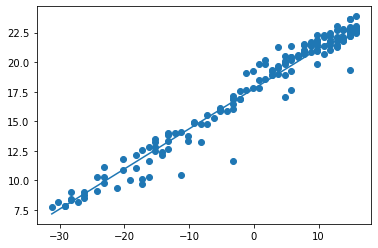

In [ ]:
# Make sure the line fits our data
Yhat = model.predict(X).flatten()
plt.scatter(X,Y)
plt.plot(X, Yhat)

In [ ]:
# Manuel calculation
# Get the weights
w,b = model.layers[0].get_weights()

# Reshape X because we flattened it again earlier
X = X.reshape(-1,1)

# (N x 1) x (1 x 1) + (1) ---> (N x 1)
Yhat2 = (X.dot(w) + b).flatten()

#Do not use == for floationg points
np.allclose(Yhat, Yhat2)

True

# ***Open Camera***

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

# **NLP(Natural_Language_Processing)**

## **Text Preprocessing**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
# Just a simple test
sentences = ["I like eggs and ham",
             "I love chocolate and bunnies",
             "I hate onions."]

In [ ]:
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

In [ ]:
print(sequences)

[[1, 3, 4, 2, 5], [1, 6, 7, 2, 8], [1, 9, 10]]


In [ ]:
#how to get the word to index mapping
tokenizer.word_index

{'and': 2,
 'bunnies': 8,
 'chocolate': 7,
 'eggs': 4,
 'ham': 5,
 'hate': 9,
 'i': 1,
 'like': 3,
 'love': 6,
 'onions': 10}

In [ ]:
# use the defaults
data = pad_sequences(sequences) # padding = bütün cümleleri ayni uzunluga getir --> kisa olanlarin sonuna veya basina 0 eklenir
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 0  0  1  9 10]]


In [ ]:
MAX_SEQUENCE_LENGTH = 5
data = pad_sequences(sequences, maxlen= MAX_SEQUENCE_LENGTH)
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 0  0  1  9 10]]


In [ ]:
data = pad_sequences(sequences, maxlen= MAX_SEQUENCE_LENGTH, padding='post')
print(data)

[[ 1  3  4  2  5]
 [ 1  6  7  2  8]
 [ 1  9 10  0  0]]


In [ ]:
# truncation --> kelimeleri kisaltma
data = pad_sequences(sequences, maxlen=4)
print(data)

[[ 3  4  2  5]
 [ 6  7  2  8]
 [ 0  1  9 10]]


## **Spam Detector with RNN**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM, Embedding
from tensorflow.keras.models import Model

In [ ]:
# Unfortunately this URL doesn't work directly with pd.read_csv
!wget -nc https://lazyprogrammer.me/course_files/spam.csv

--2021-04-27 10:21:15--  https://lazyprogrammer.me/course_files/spam.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 503663 (492K) [text/csv]
Saving to: ‘spam.csv’

spam.csv            100%[===================>] 491.86K  --.-KB/s    in 0.05s   

2021-04-27 10:21:16 (10.3 MB/s) - ‘spam.csv’ saved [503663/503663]



In [ ]:
!head spam.csv

v1,v2,,,
ham,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",,,
ham,Ok lar... Joking wif u oni...,,,
spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,,,
ham,U dun say so early hor... U c already then say...,,,
ham,"Nah I don't think he goes to usf, he lives around here though",,,
spam,"FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, �1.50 to rcv",,,
ham,Even my brother is not like to speak with me. They treat me like aids patent.,,,
ham,As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune,,,
spam,WINNER!! As a valued network customer you have been selected to receivea �900 prize reward! To claim call 09061701461. Claim 

In [ ]:
df = pd.read_csv('spam.csv', encoding='ISO-8859-1')

In [ ]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
# drop unnecessary columns
df = df.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# rename columns to something better
df.columns = ['labels', 'data']

In [ ]:
df.head()

,labels,data
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# create binary labels
df['b_labels'] = df['labels'].map({'ham': 0, 'spam': 1})
Y = df['b_labels'].values

In [ ]:
df.head()

,labels,data,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# split up the data
df_train, df_test, Ytrain, Ytest = train_test_split(df['data'], Y, test_size=0.33)

In [ ]:
# Convert sentences to sequences
MAX_VOCAB_SIZE = 20000
tokenizer = Tokenizer(num_words=MAX_VOCAB_SIZE)
tokenizer.fit_on_texts(df_train)
sequences_train = tokenizer.texts_to_sequences(df_train)
sequences_test = tokenizer.texts_to_sequences(df_test)

In [ ]:
# get word -> integer mapping
word2idx = tokenizer.word_index
V = len(word2idx)
print('Found %s unique tokens.' % V)

Found 7273 unique tokens.


In [ ]:
# pad sequences so that we get a N x T matrix
data_train = pad_sequences(sequences_train)
print('Shape of data train tensor:', data_train.shape)

# get sequence length
T = data_train.shape[1]

Shape of data train tensor: (3733, 189)


In [ ]:
data_test = pad_sequences(sequences_test, maxlen=T)
print('Shape of data test tensor:', data_test.shape)

Shape of data test tensor: (1839, 189)


In [ ]:
# Create the model

# We get to choose embedding dimensionality
D = 20

# Hidden state dimensionality
M = 15

# Note: we actually want to the size of the embedding to (V + 1) x D,
# because the first index starts from 1 and not 0.
# Thus, if the final index of the embedding matrix is V,
# then it actually must have size V + 1.

i = Input(shape=(T,))
x = Embedding(V + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation='sigmoid')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
model.compile(
  loss='binary_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


print('Training model...')
r = model.fit(
  data_train,
  Ytrain,
  epochs=10,
  validation_data=(data_test, Ytest)
)

Training model...
Epoch 1/10
117/117 [==============================] - 12s 84ms/step - loss: 0.5525 - accuracy: 0.8622 - val_loss: 0.3905 - val_accuracy: 0.8662
Epoch 2/10
117/117 [==============================] - 9s 78ms/step - loss: 0.3972 - accuracy: 0.8606 - val_loss: 0.3594 - val_accuracy: 0.8662
Epoch 3/10
117/117 [==============================] - 9s 77ms/step - loss: 0.3300 - accuracy: 0.8647 - val_loss: 0.2109 - val_accuracy: 0.8662
Epoch 4/10
117/117 [==============================] - 9s 77ms/step - loss: 0.1637 - accuracy: 0.9381 - val_loss: 0.1313 - val_accuracy: 0.9728
Epoch 5/10
117/117 [==============================] - 9s 77ms/step - loss: 0.1039 - accuracy: 0.9874 - val_loss: 0.1009 - val_accuracy: 0.9744
Epoch 6/10
117/117 [==============================] - 9s 78ms/step - loss: 0.0633 - accuracy: 0.9931 - val_loss: 0.0748 - val_accuracy: 0.9821
Epoch 7/10
117/117 [==============================] - 9s 78ms/step - loss: 0.0484 - accuracy: 0.9945 - val_loss: 0.0659 - v

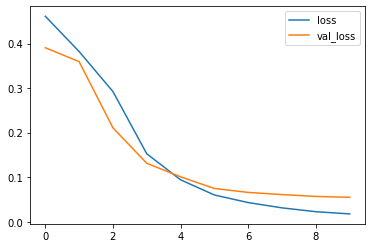

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

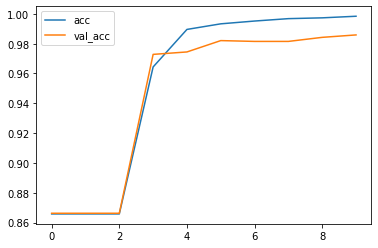

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

# **RNN (Recurrent_Neural_Network)**

In [ ]:
 import tensorflow as tf
 print(tf.__version__)

2.4.1


In [ ]:
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## **Autoregressive Linear Model**

### **Create sentetic dataset and forecast**

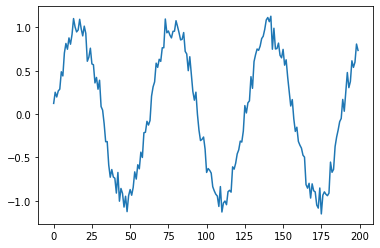

In [ ]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

# plot it
plt.plot(series)
plt.show()

In [ ]:
# build the dataset
T = 10  # we are gonna predict the next value by using last T values(now it is 10) values
X = []
Y = []
for t in range(len(series)-T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10) Y.shape (190,)


In [ ]:
i = Input(shape=(T,))
x = Dense(1)(i)
model = Model(i,x)
model.compile(loss='mse',optimizer=Adam(lr=0.1),)

# train the RNN

r = model.fit(X[:-N//2], Y[:-N//2],epochs=80,validation_data=(X[-N//2:], Y[-N//2:]),)

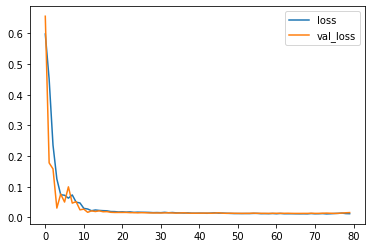

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

In [ ]:
# Forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

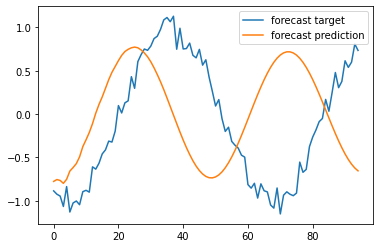

In [ ]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

## **Recurrent Neural Network**

# **Transfer Learning**

In [ ]:
# Inputs

from tensorflow.keras.layers import Input,Dense,Flatten
from tensorflow.keras.applications.vgg16 import  VGG16 as PretrainedModel, preprocess_input
from tensorflow.keras.models import  Model
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from glob import glob

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys,os

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/Food-5K.zip

--2021-04-28 06:28:45--  https://lazyprogrammer.me/course_files/Food-5K.zip
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 447001986 (426M) [application/zip]
Saving to: ‘Food-5K.zip’

Food-5K.zip         100%[===================>] 426.29M  24.4MB/s    in 22s     

2021-04-28 06:29:08 (19.1 MB/s) - ‘Food-5K.zip’ saved [447001986/447001986]



In [ ]:
!unzip -qq -o Food-5K.zip

In [ ]:
!ls

Food-5K  Food-5K.zip  __MACOSX	sample_data


In [ ]:
!ls Food-5K/training

In [ ]:
!mv Food-5K/* .

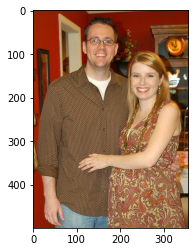

In [ ]:
plt.imshow(image.load_img('training/0_828.jpg'))
plt.show()

In [ ]:
!mkdir data

In [ ]:
#Make directories to store the data Keras-style
!mkdir data/train
!mkdir data/test
!mkdir data/train/nonfood
!mkdir data/train/food
!mkdir data/test/nonfood
!mkdir data/test/food


In [ ]:
#Move the images
#Note: we will consider 'training' to be the train set
#       'validation' folder will be the test set
#       ignore the 'evaluation' set
!mv training/0*.jpg data/train/nonfood
!mv training/1*.jpg data/train/food
!mv validation/0*.jpg data/test/nonfood
!mv validation/1*.jpg data/test/food


In [ ]:
train_path = 'data/train'
valid_path = 'data/test'

In [ ]:
IMAGE_SIZE = [200, 200]

In [ ]:
image_files = glob(train_path + '/*/*.jpg')
valid_image_files = glob(valid_path + '/*/*.jpg')

In [ ]:
# useful for getting number of classes
folders = glob(train_path + '/*')
folders

['data/train/nonfood', 'data/train/food']

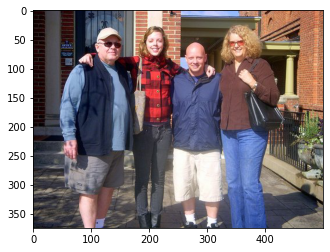

In [ ]:
plt.imshow(image.load_img(np.random.choice(image_files)))
plt.show()

In [ ]:
ptm = PretrainedModel(
    input_shape=IMAGE_SIZE + [3],
    weights='imagenet',
    include_top=False)

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
ptm.trainable = False

In [ ]:
# map the data into feature vectors

# Keras image data generator returns classes one-hot encoded

K = len(folders) # number of classes
x = Flatten()(ptm.output)
x = Dense(K,activation='softmax')(x)

In [ ]:
# create a model object
model = Model(inputs=ptm.input, outputs=x)

In [ ]:
model.summary()

In [ ]:
# create an instance of ImageDataGenerator

gen_train = ImageDataGenerator(rotation_range=20,
                               width_shift_range = 0.1,
                               height_shift_range = 0.1,
                               shear_range=0.1,
                               zoom_range=0.2,
                               horizontal_flip=True,
                               preprocessing_function=preprocess_input)

gen_test = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
batch_size = 128

#create generators
train_generator = gen_train.flow_from_directory(train_path,
                                                shuffle=True,
                                                target_size=IMAGE_SIZE,
                                                batch_size=batch_size,)

valid_generator = gen_test.flow_from_directory(valid_path,
                                               target_size=IMAGE_SIZE, 
                                               batch_size=batch_size,)

Found 3000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
#fit the model

r = model.fit_generator(train_generator,
                        validation_data=valid_generator,
                        epochs=10,
                        steps_per_epoch=int(np.ceil(len(image_files) / batch_size)),
                        validation_steps=int(np.ceil(len(valid_image_files)/ batch_size)),
                        )

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
24/24 [==============================] - ETA: 0s - loss: 3.9336 - accuracy: 0.8028 